# 18.12.2024 - Lineare Gleichungssysteme & Ähnlichkeiten 
---
Wir starten mit dem Thema Lineare Gleichungssysteme. Der Fokus liegt dabei darauf, wie diese Systeme aufgestellt und interpretiert werden. Die Berechnungen, die zur Lösung dieser Gleichungssysteme benötigt werden, werden uns von Numpy abgenommen. Danach befassen wir uns mit Ähnlichkeiten von Datensätzen und wie sie mit scikit learn bestimmt werden können. Als Anwenudngsbeispiele dienen die Ähnlichkeitsbestimmung von online-Bewertungen und von Texten, auf deren Basis eine automatische Entscheidungsfindung stattfinden wird.

* Zur Bearbeitung der Aufgaben können Sie benötigte Informationen zu Python-Befehlen und zu KI relevanten Bibliotheken (numpy, scikit, pandas) aus allen verfügbaren Quellen beziehen. Die meisten findet man natürlich über eine Suche im Internet, oder durch die Nutzung von KI chat-Systemen selbst.
Ein gutes Tutorial für den Start findet sich  z.B. hier: https://www.python-kurs.eu/numerisches_programmieren_in_Python.php

## Phase I: Wiederholung zu Vektoren und Matrizen

### Vektoren

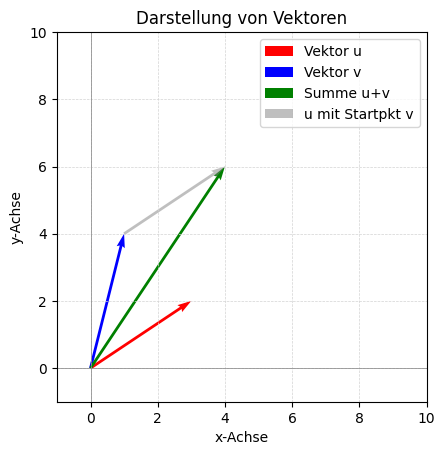

u hat die Länge 3.605551275463989
v hat die Länge 4.123105625617661
u+v hat die Länge 7.211102550927978

Das Skalarprodukt zwischen u und v ist 11


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definition der Vektoren
vector_u = np.array([3, 2])
vector_v = np.array([1, 4])
vector_z = vector_u + vector_v

# Ursprung der Vektoren
origin = np.array([0, 0])

# Erstellen der Grafik
# plt.figure(figsize=(6, 6))
plt.quiver(*origin, *vector_u, angles='xy', scale_units='xy', scale=1, color='red', label='Vektor u')
plt.quiver(*origin, *vector_v, angles='xy', scale_units='xy', scale=1, color='b', label='Vektor v')
plt.quiver(*origin, *vector_z, angles='xy', scale_units='xy', scale=1, color='g', label='Summe u+v')
plt.quiver(*vector_v, *vector_u, angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.5, label='u mit Startpkt v')

# Achsen anpassen
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)

# Beschriftung
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title('Darstellung von Vektoren')
plt.xlabel('x-Achse')
plt.ylabel('y-Achse')
plt.gca().set_aspect('equal', adjustable='box')

# Grafik anzeigen
plt.show()


# Berechnungen
print("u hat die Länge {0}".format(np.linalg.norm(vector_u)))
print("v hat die Länge {0}".format(np.linalg.norm(vector_v)))
print("u+v hat die Länge {0}".format(np.linalg.norm(vector_z)))

print("\nDas Skalarprodukt zwischen u und v ist {0}".format(np.dot(vector_u,vector_v)))

Bei der **Matrix-Vektor-Multiplikation** wird eine Matrix $A$ der Größe $m \times n$ mit einem Vektor $\mathbf{x}$ der Länge $n$ multipliziert. Das Ergebnis ist ein Vektor $\mathbf{b}$ der Länge $m$.

$$
A \cdot \mathbf{x} =
\begin{pmatrix}
\textcolor{red}{a_{11}} & \textcolor{green}{a_{12}} & \dots & \textcolor{gray}{a_{1n}} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{pmatrix}
\cdot
\begin{pmatrix}
\textcolor{red}{x_1} \\
\textcolor{green}{x_2} \\
\vdots \\
\textcolor{gray}{x_n}
\end{pmatrix}
=
\begin{pmatrix}
\textcolor{yellow}{b_1} \\
b_2 \\
\vdots \\
b_m
\end{pmatrix}
$$

Jedes Element $b_i$ wird berechnet als:

$$
\textcolor{yellow}{b_i} = \textcolor{red}{a_{i1} \cdot x_1} + \textcolor{green}{a_{i2} \cdot x_2} + \dots + \textcolor{gray}{a_{in} \cdot x_n}
$$

**Leitsatz:** *"Zeile mal Spalte."*

Die Matrix-Vektor-Multiplikation ist definiert, wenn die Anzahl der Spalten der Matrix gleich der Anzahl der Komponenten im Vektor ist.

Die allgemeine Formel für die Matrix-Vektor Multiplikation sieht wie folgt aus:

$$
b_i = \sum_{k=1}^{n} a_{ik} \cdot x_k, \quad  \text{für } i = 1,\ldots,m.
$$

#### Beispiel

$$
\begin{pmatrix} 
3 & 2 & 1 \\
\textcolor{red}{1} & \textcolor{green}{0} & \textcolor{gray}{2}
\end{pmatrix}

\cdot

\begin{pmatrix} 
\textcolor{red}{1}  \\
\textcolor{green}{0}  \\
\textcolor{gray}{4} 
\end{pmatrix}

=

\begin{pmatrix} 
3 \cdot 1 + 2 \cdot 0 + 1 \cdot 4 \\
\textcolor{red}{1 \cdot 1} + \textcolor{green}{0 \cdot 0} + \textcolor{gray}{2 \cdot 4}  
\end{pmatrix}

=

\begin{pmatrix} 
7 \\
\textcolor{yellow}{9}  
\end{pmatrix}
$$




### Für Interessierte: Matrix-Matrix-Multiplikation



Bei der **Matrix-Matrix-Multiplikation** wird eine Matrix $A$ der Größe $m \times n$ mit einer Matrix $B$ der Größe $n \times p$ multipliziert. Das Ergebnis ist eine neue Matrix $C$ der Größe $m \times p$.

$$
A \cdot B =
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn}
\end{bmatrix}
\cdot
\begin{bmatrix}
b_{11} & b_{12} & \dots & b_{1p} \\
b_{21} & b_{22} & \dots & b_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
b_{n1} & b_{n2} & \dots & b_{np}
\end{bmatrix}
=
\begin{bmatrix}
c_{11} & c_{12} & \dots & c_{1p} \\
c_{21} & c_{22} & \dots & c_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
c_{m1} & c_{m2} & \dots & c_{mp}
\end{bmatrix}
$$

Jedes Element $c_{ij}$ der Ergebnis-Matrix $C$ wird berechnet als:

$$
c_{ij} = a_{i1} \cdot b_{1j} + a_{i2} \cdot b_{2j} + \dots + a_{in} \cdot b_{nj}
$$

Auch hier gilt der **Leitsatz:** *"Zeile mal Spalte."* (wie bei der Matrix-Vektor Multiplikation)

Die allgemeine Formel zur Berechnung der Elemente der Matrix $C$ sieht wie folgt aus:

$$
c_{ij} = \sum_{k=1}^{n} a_{ik} \cdot b_{kj}
$$

- $c_{ij}$: Das Element in der $i$-ten Zeile und $j$-ten Spalte von $C$.
- $a_{ik}$: Das Element in der $i$-ten Zeile und $k$-ten Spalte von $A$.
- $b_{kj}$: Das Element in der $k$-ten Zeile und $j$-ten Spalte von $B$.


#### Beispiel

$$
\begin{pmatrix} 
3 & 2 & 1 \\
1 & 0 & 2
\end{pmatrix}

\cdot

\begin{pmatrix} 
1 & 2 \\
0 & 1 \\
4 & 0
\end{pmatrix}

=

\begin{pmatrix} 
7 & \quad 3 \cdot 2 + 2 \cdot 1 + 1 \cdot 0  \\
* & * 
\end{pmatrix}

=

\begin{pmatrix} 
7 & 8 \\
* & * 
\end{pmatrix}

=

\begin{pmatrix} 
7 & 8 \\
9 & 2
\end{pmatrix}
$$

#### Aufgabe: Multiplikation von Matrizen

Das Unternehmen aus der Aufgabe zuvor hat Daten gesammelt zu den Kosten der vergangenen 6 Monate. Die folgende Matrix gibt an, wie hoch die Kosten für jedes Produkt in jedem der vergangenen 6 Monate waren:


$$
\text{Kosten pro Einheit pro Monat} = 
\begin{pmatrix}
50 & 52 & 48 & 51 & 49 & 53 \\
30 & 32 & 29 & 31 & 28 & 30 \\
40 & 41 & 39 & 42 & 38 & 40
\end{pmatrix}
$$


Jede Zeile entspricht einem Produkt, und jede Spalte repräsentiert einen Monat.

Berechnen Sie die Gesamtkosten für jede Region für jeden der 6 Monate.
Geben Sie die Gesamtkosten als Matrix aus.



Lineare Gleichungssysteme treten in vielen Bereichen der Mathematik, Wirtschaft und Technik auf, wenn es darum geht, mehrere unbekannte Größen unter verschiedenen Bedingungen zu berechnen.
Ein lineares Gleichungssystem besteht aus mehreren linearen Gleichungen. Jeder dieser Gleichungen enthält die gesuchten unbekannten Größen als Variablen (hier: $x_1, \ldots, x_n$). Eine Lösung für die Unbekannten muss alle Gleichungen erfüllen. Jede einzelne dieser Gleichungen hat die Form:

$$
a_1 x_1 + a_2 x_2 + \dots + a_n x_n = b
$$

Dabei sind $x_1, x_2, \dots, x_n$ die *Variablen* und $a_1, a_2, \dots, a_n$ sowie $b$ sind *gegebene Konstanten*.

Wir nutzen Matrizen und Vektoren, um alle Gleichungen in einem Gesamtsystem darzustellen:

Wir fassen das System von linearen Gleichungen effizient in einer **Matrixform** zusammen. Jede Gleichung wird als eine Zeile des Gleichugnssystems betrachtet. Ein Beispiel für ein System mit 3 Variablen und 3 Gleichungen:

1. $\textcolor{red}{a_{11} x_1} + \textcolor{green}{a_{12} x_2} + \textcolor{gray}{a_{13} x_3} = \textcolor{yellow}{b_1}$
2. $a_{21} x_1 + a_{22} x_2 + a_{23} x_3 = b_2$
3. $a_{31} x_1 + a_{32} x_2 + a_{33} x_3 = b_3$

Dies kann als Matrixgleichung geschrieben werden:

$$
\begin{pmatrix}
\textcolor{red}{a_{11}} & \textcolor{green}{a_{12}} & \textcolor{gray}{a_{13}} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix}
\begin{pmatrix}
\textcolor{red}{x_1} \\
\textcolor{green}{x_2} \\
\textcolor{gray}{x_3}
\end{pmatrix}
=
\begin{pmatrix}
\textcolor{yellow}{b_1} \\
b_2 \\
b_3
\end{pmatrix}
$$

Die **Koeffizientenmatrix** (links) enthält die Koeffizienten der Variablen $x_1, x_2, x_3$, der **Lösungsvektor** (mit den Variablen) enthält die unbekannten Werte, und der **Ergebnisvektor** (rechts) enthält die Konstanten auf der rechten Seite jeder Gleichung.




### Gemeinsames Erarbeiten der Aufgabe 6 aus dem letztem Unterricht: Budgetplanung aufstellen mit der Hilfe Linearer Gleichungssysteme

Ein Unternehmen hat ein jährliches Gesamtbudget von 1.500.000 €, das auf drei Abteilungen aufgeteilt werden muss: Marketing, Forschung & Entwicklung und Produktion. Jede Abteilung benötigt einen festen Anteil des Budgets, um ihre Aufgaben zu erfüllen. 

Die Anforderungen des Managements sind wie folgt:
- Das Gesamtbudget beträgt 1.500.000 €.
- Die Forschungsabteilung benötigt 1,5-mal so viel Budget wie die Marketingabteilung.
- Die Produktionsabteilung benötigt 200.000 € mehr als die Forschungsabteilung.


Stellen Sie ein lineares Gleichungssystem auf, das die Budgeanforderungen widerspiegelt. Lösen Sie das lineare Gleichungssystem mit Hilfe von Numpy, um festzustellen, wie viel Budget jede Abteilung erhält.


In [ ]:
# Bibliotheken importieren
import numpy as np

# 1. Variablen x_1, x_2, ... definieren. Nicht im code, sondern die "Idee" dahinter:

# Marketingabteilung braucht x des Budgets
# Forschungsgabteilung braucht y des Budgets
# Produktionsabteilung braucht z des Budgets

# 2. Gleichungen aufstellen, die die Anforderungen widerspiegeln
# x + y + z = 1.500.000
# y = 1,5 * x
# z = 1,5 * x + 200.000
 
#erwartet wird von Python, folgende Form: Matrix A * Vektor(x,y,z) = Vektor b 
# 3. Umstellen, sodass alle Konstanten rechts stehen
# x + y + z = 1.500.000
# y - 1,5 * x = 0
# z - y = 200.000

# 4. Matrix A in Python definieren, die die Koeffizienten von x enthält (linke Seite der Gleichung)
#    Vektor b in Python definieren, der die Konstanten enthält (rechte Seite der Gleichung)

b = np.array([1500000 , 0 , 200000])
A = np.array([
            [ 1   ,  1 , 1],
            [-1.5 ,  1 , 0],     
            [ 0   , -1 , 1]])

# Lösen des linearen Gleichungssystems
[x, y, z] = np.linalg.solve(A,b)

# Ausgabe der Ergebnisse
print(f"Marketingabteilung erhält: {x:,.2f} €")
print(f"Forschungsabteilung erhält: {y:,.2f} €")
print(f"Produktionsabteilung erhält: {z:,.2f} €")


Marketingabteilung erhält: 325,000.00 €
Forschungsabteilung erhält: 487,500.00 €
Produktionsabteilung erhält: 687,500.00 €


'\nHier kommt auskommentierter Bereich\nder über mehrere Zeilen sich zieht\n'

Lineare Gleichungssysteme helfen nicht nur bei der Budgetplanung :)

Hier kommt eine typische Rätselaufgabe, wie man sie schon vielfach gesehen oder gehört hat.

### 1. Aufgabe:

Jörg ist dreimal so alt wie sein Sohn Thomas. </br>
Seine Tochter Carolin ist 35 jahre jünger als er. </br> 
Jörg ist doppelt so alt wie beide Kinder zusammen. 

Wie alt sind Jörg, Thomas und Carolin?


In [ ]:
# Bibliotheken importieren
import numpy as np

# 1. Variablen definieren. Nicht im code, sondern die "Idee" dahinter:
# Jörg = 3 * Thomas                 
# Carolin = Jörg - 35               
# Jörg = 2 * (Carolin + Thomas)     

# 2. Gleichungen aufstellen, die die Anforderungen widerspiegeln
# x = 3 * y
# z = x - 35
# x = 2*y + 2*z

# 3. Umstellen, sodass alle Konstanten rechts stehen
# x - 3*y = 0
# z - x = -35
# x - 2*y - 2*z = 0

# 4. Matrix A in Python definieren, die die Koeffizienten von x enthält (linke Seite der Gleichung)
#    Vektor b in Python definieren, der die Konstanten enthält (rechte Seite der Gleichung)

b = np.array([0 , -35 , 0])
A = np.array([
            [ 1 , -3 ,  0],
            [-1 ,  0 ,  1],     
            [ 1 , -2 , -2]])


# Lösen des linearen Gleichungssystems

[Jörg, Thomas, Carolin] = np.linalg.solve(A,b)

# Ausgabe

print(f"Jörg ist {Jörg:,.2f} Jahre alt")
print(f"Thomas ist {Thomas:,.2f} Jahre alt")
print(f"Carolin ist {Carolin:,.2f} Jahre alt")


Jörg ist 42.00 Jahre alt
Thomas ist 14.00 Jahre alt
Carolin ist 7.00 Jahre alt


## Phase III - Ähnlichkeiten

Im Folgenden lernen wir, wie man Ähnlichkeiten zwischen Datensätzen und sogar zwischen Texten bestimmt. Ähnlichkeiten sind eine wertvolle Information, die zur automatische Entscheidungsfindung genutzt werden. Angewandt wird dies z.B. bei Empfehlungssystemen, der Textanalyse, sowie der Klassifikation.

Die Nutzung von Ähnlichkeiten ermöglicht es, Entscheidungen auf Basis von Vorhersagen und Mustern zu treffen, ohne dass explizite Regeln vorgegeben werden müssen, was die Entscheidungsfindung effizient und skalierbar macht.

Wir bestimmen die Ähnlichkeit zwischen 2 Datensätzen mittels Kosinus-Ähnlichkeit.

### Was ist die Kosinus-Ähnlichkeit?

Die *Kosinus-Ähnlichkeit* ist ein Maß dafür, wie ähnlich sich zwei Vektoren sind. Sie ist eng verwandt mit dem Skalarprodukt, hat jedoch den Vorteil, dass die Längen der Vektoren nicht in die Berechnung der Ähnlichkeit mit einfließen.

#### Wiederholung Skalarprodukt:
Das **Skalarprodukt** zweier Vektoren $\mathbf{a} = (a_1, a_2, \dots, a_n)$ und $\mathbf{b} = (b_1, b_2, \dots, b_n)$ wird folgendermaßen berechnet:

$$
\mathbf{a} \cdot \mathbf{b} = a_1 \cdot b_1 + a_2 \cdot b_2 + \dots + a_n \cdot b_n
$$

Das Ergebnis ist eine Zahl (ein Skalar).

##### Beispiel
$$
\begin{pmatrix} 
\textcolor{red}{3} & \textcolor{green}{2} & \textcolor{gray}{1}
\end{pmatrix}

\cdot

\begin{pmatrix} 
\textcolor{red}{1}  \\
\textcolor{green}{0}  \\
\textcolor{gray}{4} 
\end{pmatrix}

=

\textcolor{red}{3 \cdot 1} + \textcolor{green}{2 \cdot 0} + \textcolor{gray}{1 \cdot 4} 

=

\textcolor{yellow}{7}
$$

Das Skalarprodukt (auch inneres Produkt oder Punkt-Produkt genannt) zweier Vektoren $ \mathbf{a} $ und $ \mathbf{b} $ ist eng mit dem Winkel $ \theta $ zwischen diesen Vektoren verknüpft. Der mathematische Zusammenhang lautet:

$$
\mathbf{a} \cdot \mathbf{b} = |\mathbf{a}| |\mathbf{b}| \cos(\theta)
$$

- $ \mathbf{a} \cdot \mathbf{b} $: Das Skalarprodukt der Vektoren $ \mathbf{a} $ und $ \mathbf{b} $.
- $ |\mathbf{a}| $ und $ |\mathbf{b}| $: Die Längen (Beträge) der Vektoren $ \mathbf{a} $ und $ \mathbf{b} $.
- $ \theta $: Der Winkel zwischen den Vektoren $ \mathbf{a} $ und $ \mathbf{b} $.

Interpretation des Skalarprodukts:
1. **Positives Skalarprodukt** ($ \mathbf{a} \cdot \mathbf{b} > 0 $): Der Winkel $ \theta $ liegt zwischen 0° und 90° (Vektoren zeigen in ähnliche Richtungen).
2. **Null Skalarprodukt** ($ \mathbf{a} \cdot \mathbf{b} = 0 $): Der Winkel $ \theta $ beträgt 90° (die Vektoren sind orthogonal, also senkrecht zueinander).
3. **Negatives Skalarprodukt** ($ \mathbf{a} \cdot \mathbf{b} < 0 $): Der Winkel $ \theta $ liegt zwischen 90° und 180° (Vektoren zeigen in entgegengesetzte Richtungen).

#### Die Kosinus-Ähnlichkeit

Die **Kosinus-Ähnlichkeit** wird wie folgt berechnet:

$$
\text{Kosinus-Ähnlichkeit}(\mathbf{a}, \mathbf{b}) = \frac{\mathbf{a} \cdot \mathbf{b}} {|\mathbf{a}| \cdot |\mathbf{b}|} = \cos(\theta)
$$

 Interpretation der Kosinus-Ähnlichkeit:
1. $\quad 0 < \text{Kosinus-Ähnlichkeit} <= 1$: Die Vektoren zeigen in eine ähnliche Richtung. Je näher der Wert an $1$ ist, desto höher ist die Änlichkeit.
2. $\quad \text{Kosinus-Ähnlichkeit} = 0$: Die Vektoren sind orthogonal (keine Ähnlichkeit).  
3. $\quad -1 <= \text{Kosinus-Ähnlichkeit} < 0$: Die Vektoren zeigen in entgegengesetzte Richtungen (sehr selten in der Praxis).


### 2. Aufgabe: Nutzer mit gleichen Interessen finden

 Rudolph besucht gerade die Startseite eines Streamingdienstes für Filme. An dieser Stelle möchte der Streamingdienst Rudolph Vorschläge machen für Filme, die andere Nutzer mit gleichen Interessen wie Rudolph geguckt haben.
 Der Streamingdienst greift dazu auf die Bewertungen seiner Nutzer zu Filmen zurück. Er vergleicht Rudolphs Filmbewertungen mit denen der anderen Nutzer, und findet darüber heraus, welcher andere Nutzer einen filmischen Geschmack hat, der am besten zu dem von Rudolph passt. Daraufhin schlägt der Streamingdienst Rudolph Filme vor, die der zu ihm passende Nutzer schon gesehen hat, Rudolph aber noch nicht. 

Was wird hier verglichen: Jeder Nutzer hat einen Vektor bestehend aus seinen Filmbewertungen. Jeder Vektor repräsentiert das Filmprofil eines Nutzers. Diese Profile (Vektoren) können miteinander verglichen werden.
Übernehmen Sie die unten angegebenen Sterne-Bewertungen von Nutzern für Filme in Python. Jeder Nutzer bekommt somit sein Bewertungsprofil als Vektor. Bestimmen Sie die Ähnlichkeiten des Profils von Rudolph mit den Profilen aller anderen User. Nutzen Sie dazu die Kosinus-Ähnlichkeit, die in der Bibliothek sklearn zur Verfügung gestellt wird.

Welcher andere Nutzer hat einen Filmgeschmack, der Rudolph am ähnlichsten ist?

|                           | Stirb langsam | Schöne Bescherung | The Beatles: Get Back (Doku) | Mitten ins Herz | O Brother, Where Art Thou? |
|---------------------------|---------------|---------------|---------------------|-----------------|----------------------------|
| User 0                      | 3             | 1             | 1                   | 4               | 3                          |
| User 1                      | 3             | 2             | 5                   | 5               | 5                          |
| User 2                      | 1             | 1             | 5                   | 5               | 4                          |
| User 3                      | 4             | 4             | 1                   | 1               | 0                          |
| User 4                      | 0             | 1             | 5                   | 0               | 1                          |
| User 5                      | 4             | 5             | 5                   | 1               | 1                          |
| Rudolph                    | 3             | 4             | 4                   | 2               | 1                          |



In [34]:
# Bibliotheken importieren
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def diy(x,y):
    return(np.dot(x.flatten(),y.flatten())/(np.linalg.norm(x)*np.linalg.norm(y)))

# Bewertungen in Python übernehmen
U_0 = np.array([[3, 1, 1, 4, 3]])
U_1 = np.array([[3, 2, 5, 5, 5]])
U_2 = np.array([[1, 1, 5, 5, 4]])
U_3 = np.array([[4, 4, 1, 1, 0]])
U_4 = np.array([[0, 1, 5, 0, 1]])
U_5 = np.array([[4, 5, 5, 1, 1]])

Rudolph = np.array([[3, 4, 4, 2, 1]])

print (diy(U_0, Rudolph))

# Das Bewertungsprofil jeden users mit dem von Rudolph vergleichen: Mittels Kosinus-Ähnlichkeit
R0 = cosine_similarity(U_0, Rudolph)
R1 = cosine_similarity(U_1, Rudolph)
R2 = cosine_similarity(U_2, Rudolph)
R3 = cosine_similarity(U_3, Rudolph)
R4 = cosine_similarity(U_4, Rudolph)
R5 = cosine_similarity(U_5, Rudolph)

# Ausgabe
print ("Rudolph x User 0:", R0)
print ("Rudolph x User 1:", R1)
print ("Rudolph x User 2:", R2)
print ("Rudolph x User 3:", R3)
print ("Rudolph x User 4:", R4)
print ("Rudolph x User 5:", R5)

0.6880624620561867
Rudolph x User 0: [[0.68806246]]
Rudolph x User 1: [[0.817303]]
Rudolph x User 2: [[0.7330785]]
Rudolph x User 3: [[0.85972695]]
Rudolph x User 4: [[0.70938044]]
Rudolph x User 5: [[0.98339799]]


### 3. Aufgabe: Ähnlichkeit zwischen Texten bestimmen

Ein Technikkonzern hat eine neue Smartwatch auf den Markt gebracht. Kurz nach Markteinführung sammelt er große Mengen an Feedback und Meinungen, die Käufer an verschiedenen Stellen online veröffentlicht haben. Diese Feedback-Texte werden nun bezüglich ihrer Ähnlichkeit zueinander untersucht. Mit dieser Methode gruppiert der Konzern ähnliche Texte  und findet "Ausreißertexte" mit Meinungen, die hervorstechen.

Erfassen Sie unten stehende Feedbacktexte in einer Liste in Python. Damit Sie mit den Texten "rechnen" können, müssen sie vorher in numerische Werte übersetzt werden. Benutzen Sie dazu den "TfidfVectorizer" aus der sklearn Bibliothek. Dieses tool wandelt jeden Text in einen numerischen Vektor um. Nach dessen Anwendung können Sie die Cosinus-Ähnlichkeit der Vektoren (und damit der zugehörigen Texte) zueinander berechnen. 

Lassen Sie sich eine "Ähnlichkeitsmatrix" ausgeben, die die Werte der Kosinus-Ähnlichkeit zwischen allen Textpaaren enthält.
Lassen Sie sich zusätzlich diejenigen Textpaare explizit ausgeben, deren Ähnlichkeitswert unter 0.1 liegt.

Sie können folgende 10 Feedback-Texte nutzen (Doppelklick in diese Zelle, um die Texte in passendem copy-paste Format zu sehen):

"Stylisch und robust, mit smarter Funktionalität, wasserdichtem Design und einem langlebigen Akku – perfekt für Alltag und Sport.",
"Elegant, komfortabel und wasserdicht, mit smarten Features und einem langlebigen Akku, ideal für Freizeit und Beruf.",
"Innovativ und stilvoll, mit robuster Technik, smarter Funktionalität und einer Akkulaufzeit, die dich durch den Tag begleitet.",
"Präzise, smart und wasserdicht, mit einem langlebigen Akku und vielseitigen Anwendungen – entwickelt für maximale Effizienz.",
"Diese Smartwatch ist robust und wasserdicht, kombiniert stylisches Design mit smarter Technik und beeindruckender Akkulaufzeit.",
"Komfortabel und präzise, mit smarten Funktionen, einem langlebigen Akku, und wasserdicht, – perfekt für jeden Tag.",
"Stilvoll, perfekte Smartwatch, robust und wasserdicht, mit vielseitigen Funktionen, smarten Features und einer zuverlässigen Akkulaufzeit.",
"Kombination aus smarten Funktionen, wasserdicht und mit vielsitigen Anwendungen, robust und langlebig - für jeden Tag geeignet.",
"Aussehen veraltet, mangelhafte Verarbeitung, leider schnell leer, nur eingeschränkte Funktionen, langweilig – deshalb enttäuschend für den Alltag.",
"Langweilig und enttäuschend, keine neuen Funktionen, Aussehen veraltet, leider nichts für mich"

In [ ]:
# Bibliotheken importieren

# Feedback-Texte in Python übernehmen

# TF-IDF-Berechnung

# Kosinus-Ähnlichkeit aller Textpaare berechnen

# Ausgabe der Ähnlichkeitsmatrix

# Ausgabe der Textpaare, deren Kosinus-Ähnlichkeit < 0.1 ist.

<div style="text-align: center; font-family: 'Brush Script MT', cursive; font-size: 36px; color: darkred;"> 
    Frohe Weihnachten und ein glückliches neues Jahr! <br> 🎄
</div>